In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

#reading files individually and then combined.

In [2]:
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
ride_city_data = pd.merge(ride_data_to_load, city_data_to_load, how = "left", on = "city")
ride_city_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
#Gathers information for each city type
urban = ride_city_data.loc[ride_city_data["type"]=="Urban"]
rural = ride_city_data.loc[ride_city_data["type"]=="Rural"]
suburban = ride_city_data.loc[ride_city_data["type"]== "Suburban"]

#making x and y for plot points
urbanx = urban.groupby("city").count()["fare"]
urbany = urban.groupby("city").mean()["fare"]


ruralx = rural.groupby("city").count()["fare"]
ruraly = rural.groupby("city").mean()["fare"]
#rur_drivers = rural["driver_count"].mean()

suburbanx = suburban.groupby("city").count()["fare"]
suburbany = suburban.groupby("city").mean()["fare"]
#sub_drivers = suburban["driver_count"].mean()


In [6]:
#finding min and max for x and y limits
x_list = [urbanx,ruralx,suburbanx]
y_list = [urbany,ruraly,suburbany]

#xmax
xmax = 0

for types in x_list:
    for x in types:
        if x > xmax:
            xmax = x
#xmin
xmin = xmax

for types in x_list:
    for x in types:
        if x < xmin:
            xmin = x
#ymax
ymax = 0

for types in y_list:
    for y in types:
        if y > ymax:
            ymax = y

#ymin
ymin = ymax

for types in y_list:
    for y in types:
        if y < ymin:
            ymin = y


In [7]:
#use for the range size in bubble plot
urbans_driver = ride_city_data.loc[ride_city_data["type"] == "Urban"]
suburbans_driver = ride_city_data.loc[ride_city_data["type"]=="Suburban"]
rurals_driver = ride_city_data.loc[ride_city_data["type"] == "Rural"]



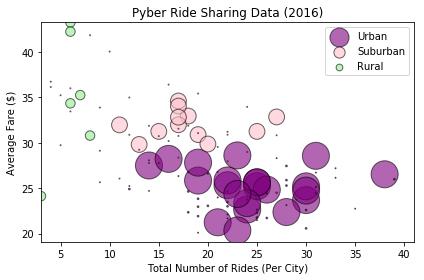

In [8]:
#making a scatter plot
plt.xlim(xmin,xmax+2);
plt.ylim(ymin-1,ymax);

maxx = max(ride_city_data["driver_count"])
minn = min(ride_city_data["driver_count"])

#ranges for sizes of dots
urb = (min(urbans_driver["driver_count"]),max(urbans_driver["driver_count"]*10),1)
sub = (min(suburbans_driver["driver_count"]),max(suburbans_driver["driver_count"]*10),1)
rur = (min(rurals_driver["driver_count"]),max(rurals_driver["driver_count"]*10),1)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


plt.scatter(urbanx, urbany, marker="o", facecolors="purple", edgecolors="black",
            s=urb, alpha=0.60, label = "Urban");
plt.scatter(suburbanx, suburbany, marker="o", facecolors="pink", edgecolors="black",
            s=sub, alpha=0.60, label = "Suburban");
plt.scatter(ruralx, ruraly, marker="o", facecolors="lightgreen", edgecolors="black",
            s=rur, alpha=0.60, label = "Rural");
plt.legend(loc = "best");

plt.tight_layout()

## Total Fares by City Type

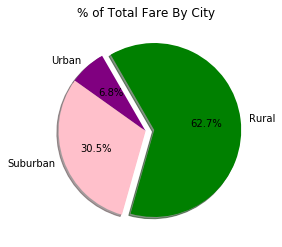

In [9]:
# Calculate Type Percents
total_fares = ride_city_data["fare"].sum()
types = ride_city_data.groupby("type").sum()
types["percents"] = types["fare"]/total_fares*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off");
plt.title("% of Total Fare By City");

# Save Figure
plt.savefig("FaresPercent.png")

## Total Rides by City Type

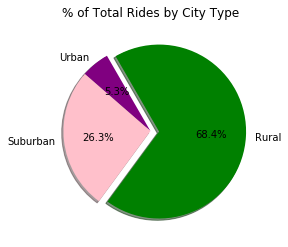

In [10]:
# Calculate Ride Percents
total_ride = ride_city_data["ride_id"].count()
ride_types = ride_city_data.groupby("type").count()
ride_types["percents"] = ride_types["ride_id"]/total_ride*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = ride_types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off")
plt.title("% of Total Rides by City Type");

# Save Figure
plt.savefig("RidePercent.png")


## Total Drivers by City Type

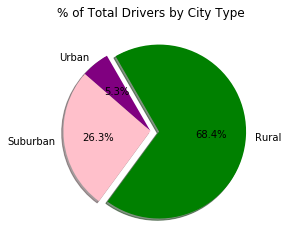

In [11]:
# Calculate Driver Percents
total_drivers = ride_city_data["driver_count"].count()
driver_types = ride_city_data.groupby("type").count()
driver_types["percents"] = driver_types["driver_count"]/total_drivers*100

#Prework for pie chart
labels = ["Urban","Suburban","Rural"]
percents = driver_types["percents"]
colors = ["Purple","Pink","Green"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(percents, labels=labels, colors=colors, 
         explode = explode,autopct = "%1.1f%%", shadow=True, startangle=120);
# axis equal so we have a perfect circle
plt.axis("off");
plt.title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("DriversPercent.png")